# The Shifting Landscape of the US Economy from 1947 to 2023

In this project, we explore the transformation of the U.S. economy by analyzing gross output data from 1947 to 2023 across various industries. Using data sourced from the Bureau of Economic Analysis (BEA), we reshape historical industry-level output figures into a structured format that allows for deeper analysis. By leveraging data wrangling techniques, series visualizations, and share calculations, we uncover key patterns in the evolution of different sectors.

Our goal is to understand which industries have grown, which have declined, and why these shifts have occurred. We compute the gross output share of each industry to assess its relative importance in the economy over time. Using trend analysis, visualizations, and historical context, we examine the impact of globalization, technological advancements, policy changes, and shifts in consumer behavior on industry performance. By comparing decades of economic data, we illustrate how the U.S. has transitioned from a manufacturing-driven economy to one dominated by services, finance, and technology.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/gross-output-by-industry.xlsx'
save_dir = 'out/'

In [41]:
# Displays all relevant data for a dataframe
def display_data(df, name, desc):
    print(name + ':', desc)
    print(name, "Columns")
    print(df.columns)
    print(name, "Types")
    print(df.dtypes)
    print(name, "Data")
    print(df)

# Saves the dataframe to the out folder as an excel file given a filename
def save_data(df, filename):
    df.to_excel(save_dir + filename + '.xlsx', index=False)

# Preprocess the data
def preprocess_data(df, header_row, last_data_row, total_line, lines):
    df = df.copy()
    df.iloc[header_row, 1] = "Industry"
    df.columns = df.iloc[header_row].apply(lambda x: int(x) if isinstance(x, float) else x)
    df = df.iloc[header_row + 1:last_data_row].copy()
    df.dropna(subset=["Line"], inplace=True)
    df["Line"] = df["Line"].astype(int)
    all_industry_row = df[df["Line"] == total_line].copy()
    df = df[df["Line"].isin(lines)]
    df["Industry"] = df["Industry"].astype(str).str.strip()
    for col in df.columns:
        if col != "Industry":
            df[col] = df[col].astype(int)
    df.loc["Total"] = df.sum()
    df.loc["Total", "Industry"] = "Summed Total"
    df.loc["Total", "Line"] = 0
    differences = []
    for col in df.columns:
        if col != "Line" and col != "Industry":
            differences.append(all_industry_row[col].values[0] - df.loc["Total"][col])
    return df, differences

In [42]:
# Define the parts of the data we are interested in
SHEET1_COLUMN_HEADERS_ROW = 4
SHEET1_LAST_DATA_ROW = 107

SHEET1_TOTAL_LINE = 1
SHEET1_LINES_OF_INTEREST = [3, 6, 10, 11, 13, 25, 34, 35, 40, 49, 55, 61, 64, 66, 70, 71, 75, 76, 83, 86, 89, 91, 96]

SHEET2_COLUMN_HEADERS_ROW = 6
SHEET2_LAST_DATA_ROW = 108

SHEET2_TOTAL_LINE = 1
SHEET2_LINES_OF_INTEREST = [3, 6, 10, 11, 13, 25, 34, 35, 40, 49, 55, 61, 64, 66, 70, 71, 75, 76, 82, 85, 88, 90, 95]


# Load the Excel file data
df_sheet1 = pd.read_excel(data_path, sheet_name='1947-1997')
df_sheet2 = pd.read_excel(data_path, sheet_name='1997-2023')
df_sheet2.drop(df_sheet2.columns[2], axis=1, inplace=True)

# Manipulating the Data

### Preprocess 1947-1997 Data and Check Rounding Error

Sheet 1: 1947-1997 Gross Output by Industry Data
Sheet 1 Columns
Index(['Line', 'Industry', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997'],
      dtype='object', name=4)
Sheet 1 Types
4
Line         int64
Industry    object
1947         int64
1948         int64
1949         int64
1950         int64
1951         int64
1952         int64
1953         int64
1954         int64
1955         int64
1956         int64
1957         int64
1958         int64
1959         int64
1960         int64
1961         int64
1962         int64
1963         int64
1964         int64
1965         int64
1966         int64


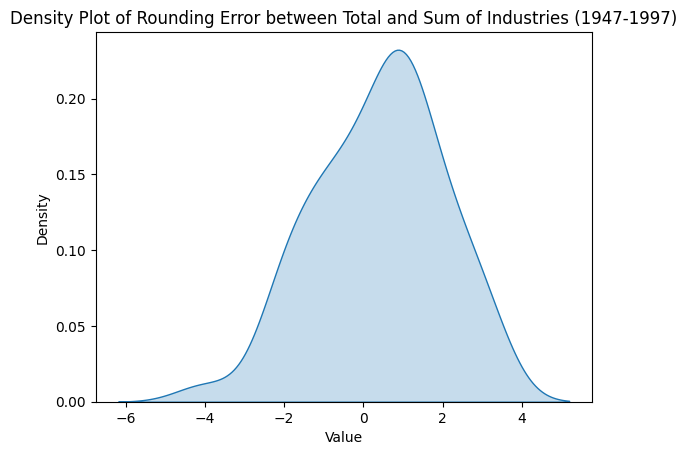

In [43]:
df1, differences1 = preprocess_data(df_sheet1, SHEET1_COLUMN_HEADERS_ROW, SHEET1_LAST_DATA_ROW, SHEET1_TOTAL_LINE, SHEET1_LINES_OF_INTEREST)
display_data(df1, "Sheet 1","1947-1997 Gross Output by Industry Data" )

print("Sheet 1 Differences")
print(differences1)
sns.kdeplot(differences1, fill=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Plot of Rounding Error between Total and Sum of Industries (1947-1997)")
plt.show()

### Preprocess 1997-2023 Data and Check Rounding Error

Sheet 2: 1997-2023 Gross Output by Industry Data
Sheet 2 Columns
Index([    'Line', 'Industry',       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013,       2014,       2015,       2016,       2017,       2018,
             2019,       2020,       2021,       2022,       2023],
      dtype='object', name=6)
Sheet 2 Types
6
Line         int64
Industry    object
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
2014         int64
2015         int64
2016         int64
2017         int64
2018         int64
2019         int64
2020         int64
2021       

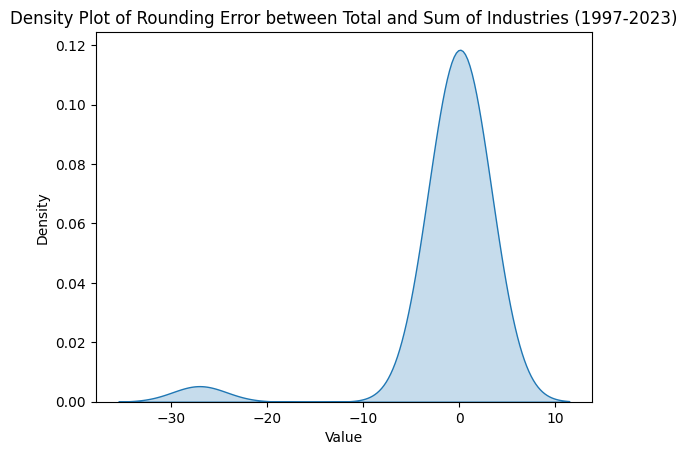

In [44]:
df2, differences2 = preprocess_data(df_sheet2, SHEET2_COLUMN_HEADERS_ROW, SHEET2_LAST_DATA_ROW, SHEET2_TOTAL_LINE, SHEET2_LINES_OF_INTEREST)
display_data(df2, "Sheet 2", "1997-2023 Gross Output by Industry Data")

print("Sheet 2 Differences")
print(differences2)
sns.kdeplot(differences2, fill=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Plot of Rounding Error between Total and Sum of Industries (1997-2023)")
plt.show()


### Combine the 1947-1997 and 1997-2023 Data into One DataFrame

In [45]:
df1_c = df1.drop(columns=["Line", "1997"]).reset_index(drop=True)
df2_c = df2.drop(columns=["Line", "Industry"]).reset_index(drop=True)
df_combined = df1_c.join(df2_c)
df_combined.columns = [int(col) if str(col).isdigit() else col for col in df_combined.columns]

display_data(df_combined, "Combined Sheets", "1947-2023 Gross Output by Industry Data")
save_data(df_combined, "combined-gross-output-by-industry")

Combined Sheets: 1947-2023 Gross Output by Industry Data
Combined Sheets Columns
Index(['Industry',       1947,       1948,       1949,       1950,       1951,
             1952,       1953,       1954,       1955,       1956,       1957,
             1958,       1959,       1960,       1961,       1962,       1963,
             1964,       1965,       1966,       1967,       1968,       1969,
             1970,       1971,       1972,       1973,       1974,       1975,
             1976,       1977,       1978,       1979,       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013,       2014,       2

### Reshape the Data to have Entries for Every Year and Industry

In [46]:

df_long = df_combined.melt(id_vars=["Industry"], var_name="Year", value_name="Gross Output")
cols = list(df_long.columns)
cols[0], cols[1] = cols[1], cols[0]
df_long = df_long[cols]

display_data(df_long, "Reshaped Long Data", "1947-2023 Gross Output by Year and Industry Data")

Reshaped Long Data: 1947-2023 Gross Output by Year and Industry Data
Reshaped Long Data Columns
Index(['Year', 'Industry', 'Gross Output'], dtype='object')
Reshaped Long Data Types
Year            object
Industry        object
Gross Output     int64
dtype: object
Reshaped Long Data Data
      Year                                     Industry  Gross Output
0     1947  Agriculture, forestry, fishing, and hunting         32163
1     1947                                       Mining         10822
2     1947                                    Utilities          6005
3     1947                                 Construction         21209
4     1947                                Durable goods         80934
...    ...                                          ...           ...
1843  2023              Accommodation and food services       1670873
1844  2023            Other services, except government       1016534
1845  2023                                      Federal       1529580
1846  2023  

### Add a column for the share of each industry in the total output for each year


In [47]:
totals_per_year = df_long[df_long["Industry"] == "Summed Total"].drop(columns=["Industry"]).rename(columns={"Gross Output": "Year Total"}).reset_index(drop=True)
df_share = df_long[df_long["Industry"] != "Summed Total"]
df_share = df_share.merge(totals_per_year, on="Year", how="left")
df_share["Gross Output Share"] = df_share["Gross Output"] / df_share["Year Total"] * 100

display_data(df_share, "Long Share Data", "1947-2023 Gross Output and Share by Year and Industry Data")
save_data(df_share, "gross-output-by-year-and-industry")

Long Share Data: 1947-2023 Gross Output and Share by Year and Industry Data
Long Share Data Columns
Index(['Year', 'Industry', 'Gross Output', 'Year Total', 'Gross Output Share'], dtype='object')
Long Share Data Types
Year                   object
Industry               object
Gross Output            int64
Year Total              int64
Gross Output Share    float64
dtype: object
Long Share Data Data
      Year                                     Industry  Gross Output  \
0     1947  Agriculture, forestry, fishing, and hunting         32163   
1     1947                                       Mining         10822   
2     1947                                    Utilities          6005   
3     1947                                 Construction         21209   
4     1947                                Durable goods         80934   
...    ...                                          ...           ...   
1766  2023          Arts, entertainment, and recreation        517711   
1767  2023   

# Visualizing Takeaways

In [48]:
# Plots the evolution of the industries specified
def plot_industry_evolution(df, industries, title):
    years = range(min(df['Year']), max(df['Year']) + 1)

    plt.figure(figsize=(14, 10))
    for industry in industries:
        evolution = df[df["Industry"] == industry]["Gross Output Share"].reset_index(drop=True)
        plt.plot(years, evolution, label=industry)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Gross Output Share')
    plt.legend()
    plt.grid(True)
    plt.show()


### Plot Evolution from 1947 to 2023 of Gross Output Share for the Top 10 Industries in 1947

The top 10 industries in 1947 and their respective Gross Output Share:
                                      Industry  Gross Output Share
0                             Nondurable goods           22.062320
1                                Durable goods           17.151176
2                                 Retail trade            7.870545
3  Agriculture, forestry, fishing, and hunting            6.815841
4                                      Federal            5.464032
5               Transportation and warehousing            5.024095
6                                  Real estate            4.899065
7                                 Construction            4.494518
8                              Wholesale trade            4.153757
9              Accommodation and food services            3.035903


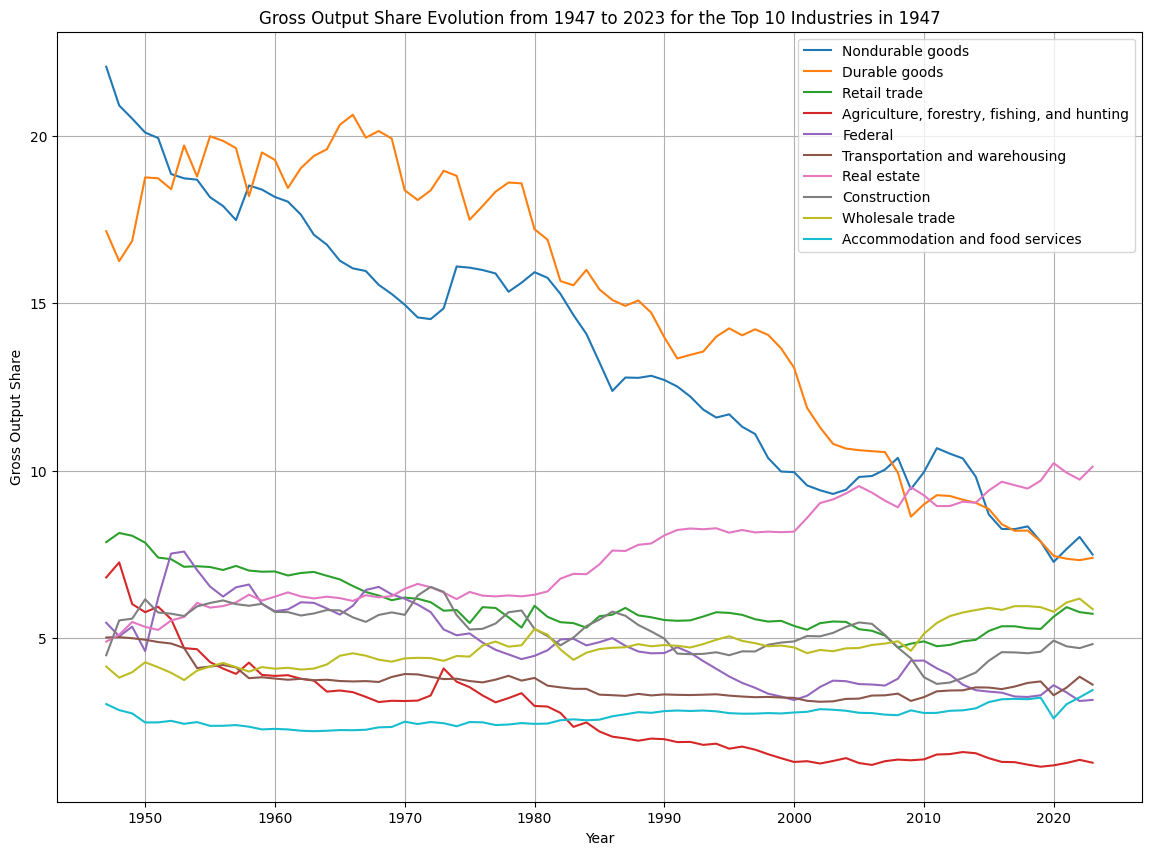

In [49]:
industries1947 = df_share[df_share["Year"] == 1947].drop(columns=["Year", "Gross Output", "Year Total"]).reset_index(drop=True)
industries1947.sort_values(by="Gross Output Share", ascending=False, inplace=True, ignore_index=True)
top10 = industries1947.iloc[:10]
top10industries = top10["Industry"].values

print("The top 10 industries in 1947 and their respective Gross Output Share:")
print(top10)
plot_industry_evolution(df_share, top10industries,  'Gross Output Share Evolution from 1947 to 2023 for the Top 10 Industries in 1947')

#### Figure 1 Analysis

The top 10 industries in 1947 based on Gross Output Share are 
(1) Nondurable goods, (2) Durable goods, (3) Retail trade, (4) Agriculture, forestry, fishing, and hunting, (5) Federal, (6) Transportation and warehousing, (7) Real estate, (8) Construction, (9) Wholesale trade, and (10) Accommodation and food services. 

The shares of these industries in gross output have significantly changed from 1947 to 2023. The share of top 2 industries (Nondurable goods and Durable goods) have drastically decreased from around 20% to about 7%. Real estate has increased from 5% to 10%, Agriculture, forestry, fishing, and hunting has decreased from about 7% to less than 2%, and all the other industries have fluctuated over the period but remained about the same. 

These changes reflect the shift in the US economy from manufacturing to services and real estate. From 1947 to 2023, the US economy has become more service-oriented and outsourced a lot of manufacturing to other countries. At the same time, rising population density and urbanization have increased the demand for real estate, and advancements in technology have increased the efficiency of agriculture, forestry, fishing, and hunting so that less labor is needed in these industries for less costs. We will go deeper into these trends in the next section.

### Plot Evolution from 1947 to 2023 of Gross Output Share for the Top 5 Industries with the Largest Percent Increase and Decrease in Gross Output Share

In [50]:
industries2023 = df_share[df_share["Year"] == 2023].drop(columns=["Year","Gross Output", "Year Total"]).reset_index(drop=True)
df_1947_2023 = industries1947.merge(industries2023, on="Industry", suffixes=(" 1947", " 2023"))
df_1947_2023["Gross Output Percent Change"] = (df_1947_2023["Gross Output Share 2023"] - df_1947_2023["Gross Output Share 1947"]) / df_1947_2023["Gross Output Share 1947"] * 100
df_1947_2023.sort_values(by="Gross Output Percent Change", ascending=False, inplace=True, ignore_index=True)

print("The percent change in Gross Output Share between 1947 and 2023 of all industries:")
print(df_1947_2023)

The percent change in Gross Output Share between 1947 and 2023 of all industries:
                                             Industry  \
0        Administrative and waste management services   
1    Professional, scientific, and technical services   
2                   Health care and social assistance   
3                               Finance and insurance   
4   Rental and leasing services and lessors of int...   
5                                Educational services   
6                                     State and local   
7                                         Information   
8                                         Real estate   
9                 Arts, entertainment, and recreation   
10            Management of companies and enterprises   
11                                    Wholesale trade   
12                    Accommodation and food services   
13                                       Construction   
14                                          Utilities   
15    

The top 5 industries with the Largest Percent Increase in Gross Output Share:
                                            Industry  Gross Output Share 1947  \
0       Administrative and waste management services                 0.433579   
1   Professional, scientific, and technical services                 1.190754   
2                  Health care and social assistance                 1.210674   
3                              Finance and insurance                 2.369004   
4  Rental and leasing services and lessors of int...                 0.416838   

   Gross Output Share 2023  Gross Output Percent Change  
0                 3.085362                   611.602600  
1                 6.819094                   472.670404  
2                 6.794135                   461.186253  
3                 7.821065                   230.141452  
4                 1.353648                   224.741977  


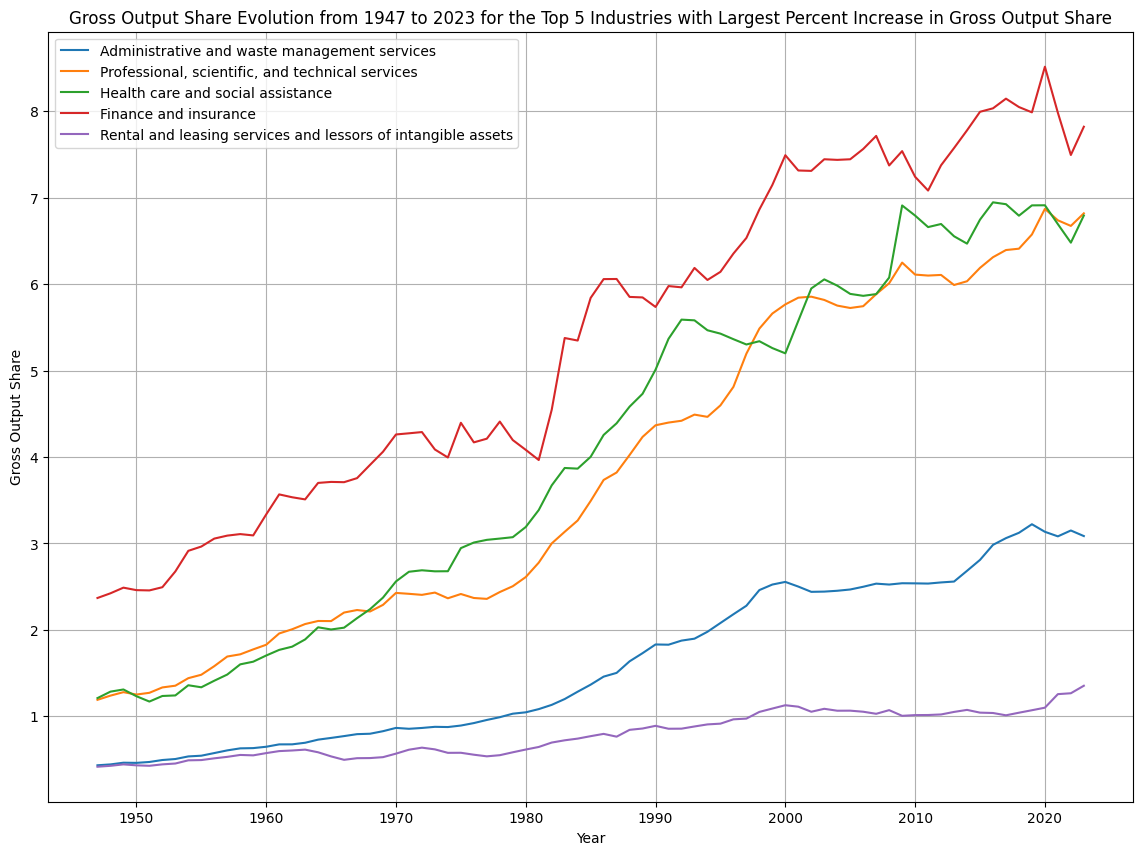

In [51]:
top5 = df_1947_2023.iloc[:5]
top5industries = top5["Industry"].values

print("The top 5 industries with the Largest Percent Increase in Gross Output Share:")
print(top5)
plot_industry_evolution(df_share, top5industries,  'Gross Output Share Evolution from 1947 to 2023 for the Top 5 Industries with Largest Percent Increase in Gross Output Share')

#### Figure 2 Analysis

The top 5 industries with the largest percent increase in gross output share from 1947 to 2023 are (1) Administrative and waste management services, (2) Professional, scientific, and technical services, (3) Health care and social assistance, (4) Finance and insurance, and (5) Rental and leasing services and lessors of intangible assets.

All these industries have more than doubled in gross output share from 1947 to 2023, with the top industry having an over 600% increase and the two after having an over 450% increase. 


These industries have increased due to the economy's shift from manufacturing to services and real estate as well as technological advancements as mentioned in the Figure 1 analysis. The increase of professional, scientific, and technical services are a direct product of our service-base economy. Shifting to an economy that relies on knowledge and providing services that lease expertise, it makes sense that this industry has grown so much overtime. Technological advancements like the rise of the internet and needing to be more tech savvy have also contributed to this increase. Similarly, administrative and waste management services are also a direct product of the shift to a service-based economy along with increased regulation regarding the environment. From 1947 to 2023, many laws were passed requiring companies to do more and thus pay more when handling and disposing of waste. The increase in rental and leasing services also reflects the shift to a rental economy due to an increased population and urbanization, again as mentioned in the Figure 1 analysis. The increase of the finance and insurance industry is too due to the shift to a service economy but also due to the increase in the income gap and the boom of the stock market. With the financialization of the economy and so many people and companies investing in stock over the years, it makes sense to see a huge increase here. Lastly, the increase in the health care industry can mainly be attributed to advancements in medicine and the US's health care system. Because of advancements in medicine, people live longer leading to an aging population and an increased demand for hospitals and care for the elderly. Then, because of the US's privatized health care system, it has allowed the health care industry to take advantage of this needy population and flourish.

The bottom 5 industries with the Smallest Percent Decrease in Gross Output Share:
                                       Industry  Gross Output Share 1947  \
18                                       Mining                 2.293351   
19                                      Federal                 5.464032   
20                                Durable goods                17.151176   
21                             Nondurable goods                22.062320   
22  Agriculture, forestry, fishing, and hunting                 6.815841   

    Gross Output Share 2023  Gross Output Percent Change  
18                 1.486891                   -35.165132  
19                 3.161151                   -42.146183  
20                 7.401786                   -56.843859  
21                 7.500924                   -66.001198  
22                 1.284827                   -81.149393  


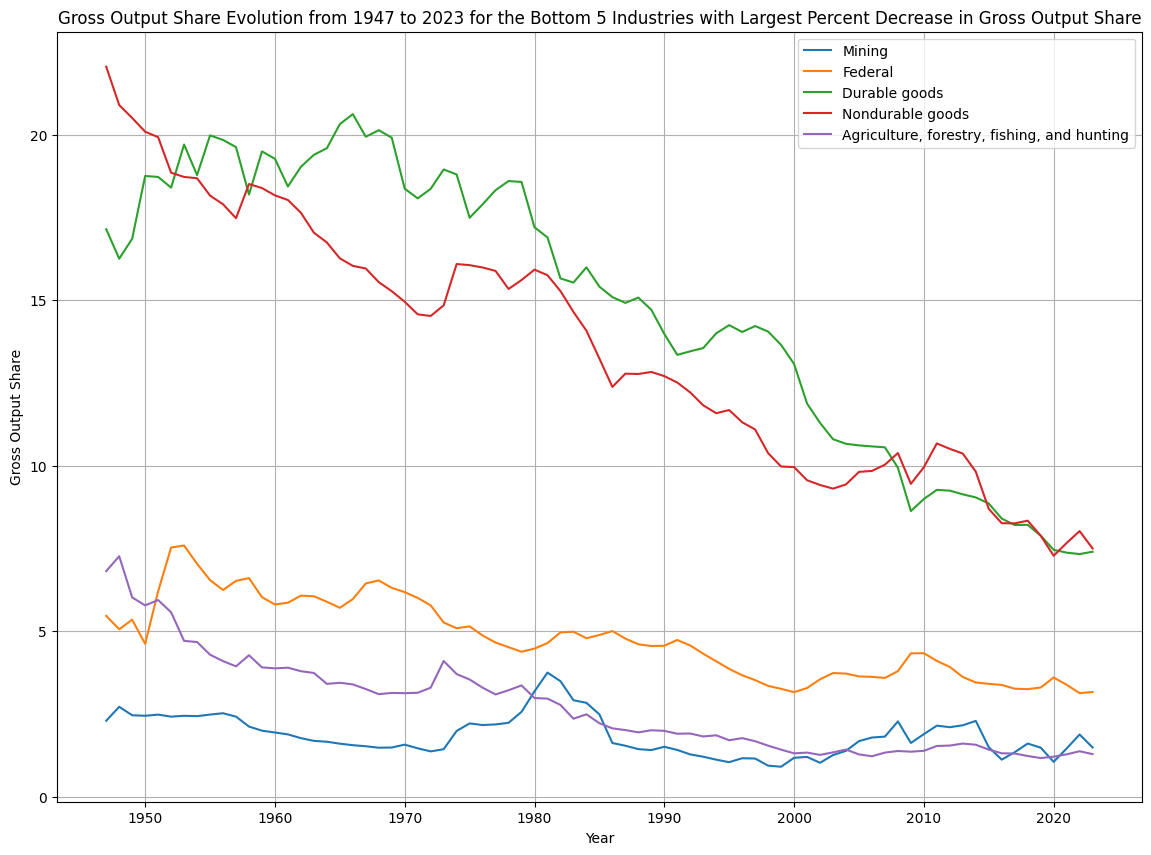

In [52]:
bottom5 = df_1947_2023.iloc[-5:]
bottom5industries = bottom5["Industry"].values

print("The bottom 5 industries with the Smallest Percent Decrease in Gross Output Share:")
print(bottom5)
plot_industry_evolution(df_share, bottom5industries,  'Gross Output Share Evolution from 1947 to 2023 for the Bottom 5 Industries with Largest Percent Decrease in Gross Output Share')

#### Figure 3 Analysis

The top 5 industries with the largest percent decrease in gross output share from 1947 to 2023 are (1) Mining, (2) Federal, (3) Durable goods, (4) Nondurable goods, and (5) Agriculture, forestry, fishing, and hunting. 

These industries have decreased by 35% to about 80% in gross output share from 1947 to 2023. Nondurable and durable goods had a significant share of gross output (about 20%) in 1947 while the other 3 industries have always had a smaller share (less than 8%). The decrease of Durable goods, Nondurable goods, and Agriculture, forestry, fishing, and hunting tend to be more pronounced while the Mining and Federal seemed to fluctuate more over the years.

We again will build off our analysis from Figures 1 and 2 to explain these decreases, understanding the US economy's shift from manufacturing to services and real estate amidst technological advancements. The decrease of the Nondurable goods and Durable goods industries are a direct result of the US outsourcing a lot of manufacturing to other countries as it shifted to a services economy. The decrease of Agriculture, forestry, fishing, and hunting is mainly due to advancements in technology that have increased the efficiency of these industries so that less labor is needed for less costs, as stated in the Figure 1 analysis. The decrease of the Mining industry is due to the US moving away from coal as an energy resource. With more environmental regulations, the US passed laws divesting from the domestic extraction of coal. Instead, the US used more of other energy sources and relied more on energy imports from other countries. Lastly, the decrease of the Federal industry is due to the reduction of things the federal government is expected to provide. Over the years, many services that the federal government handled like airlines and energy became the responsibility of private companies and a lot of military research has been outsourced to private companies in the form of government contracts. It is also worth noting that in 1947, federal spending was particularly high due to WWII, so part of the decrease is also a result of the US economy returning to normal after the war.